# Hands-on Activity 1.3 | Transportation using Graphs

#### Objective(s):

This activity aims to demonstrate how to solve transportation related problem using Graphs

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to compute the shortest path from source to destination using graphs
* Apply DFS and BFS to compute the shortest path

#### Resources:
* Jupyter Notebook

#### Procedures:

1. Create a Node class

In [ ]:
class Node(object):
    def __init__(self, name):
        """Assumes name is a string"""
        self.name = name
    def getName(self):
        return self.name
    def __str__(self):
        return self.name

2. Create an Edge class

In [ ]:
class Edge(object):
    def __init__(self, src, dest):
        """Assumes src and dest are nodes"""
        self.src = src
        self.dest = dest
    def getSource(self):
        return self.src
    def getDestination(self):
        return self.dest
    def __str__(self):
        return self.src.getName() + '->' + self.dest.getName()

3. Create Digraph class that add nodes and edges

In [ ]:
class Digraph(object):
    """edges is a dict mapping each node to a list of
    its children"""
    def __init__(self):
        self.edges = {}
    def addNode(self, node):
        if node in self.edges:
            raise ValueError('Duplicate node')
        else:
            self.edges[node] = []
    def addEdge(self, edge):
        src = edge.getSource()
        dest = edge.getDestination()
        if not (src in self.edges and dest in self.edges):
            raise ValueError('Node not in graph')
        self.edges[src].append(dest)
    def childrenOf(self, node):
        return self.edges[node]
    def hasNode(self, node):
        return node in self.edges
    def getNode(self, name):
        for n in self.edges:
            if n.getName() == name:
                return n
        raise NameError(name)
    def __str__(self):
        result = ''
        for src in self.edges:
            for dest in self.edges[src]:
                result = result + src.getName() + '->'\
                         + dest.getName() + '\n'
        return result[:-1] #omit final newline

4. Create a Graph class from Digraph class that deifnes the destination and Source

In [ ]:
class Graph(Digraph):
    def addEdge(self, edge):
        Digraph.addEdge(self, edge)
        rev = Edge(edge.getDestination(), edge.getSource())
        Digraph.addEdge(self, rev)

5. Create a buildCityGraph method to add nodes (City) and edges   (source to destination)

In [ ]:
def buildCityGraph(graphType):
    g = graphType()
    for name in ('Boston', 'Providence', 'New York', 'Chicago', 'Denver', 'Phoenix', 'Los Angeles'):
        #Create 7 nodes
        g.addNode(Node(name))
    g.addEdge(Edge(g.getNode('Boston'), g.getNode('Providence')))
    g.addEdge(Edge(g.getNode('Boston'), g.getNode('New York')))
    g.addEdge(Edge(g.getNode('Providence'), g.getNode('Boston')))
    g.addEdge(Edge(g.getNode('Providence'), g.getNode('New York')))
    g.addEdge(Edge(g.getNode('New York'), g.getNode('Chicago')))
    g.addEdge(Edge(g.getNode('Chicago'), g.getNode('Denver')))
    g.addEdge(Edge(g.getNode('Denver'), g.getNode('Phoenix')))
    g.addEdge(Edge(g.getNode('Denver'), g.getNode('New York')))
    g.addEdge(Edge(g.getNode('Los Angeles'), g.getNode('Boston')))
    return g

In [ ]:
def printPath(path):
    """Assumes path is a list of nodes"""
    result = ''
    for i in range(len(path)):
        result = result + str(path[i])
        if i != len(path) - 1:
            result = result + '->'
    return result

6. Create a method to define DFS technique

In [ ]:
def DFS(graph, start, end, path, shortest, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes;
          path and shortest are lists of nodes
       Returns a shortest path from start to end in graph"""
    path = path + [start]
    if toPrint:
        print('Current DFS path:', printPath(path))
    if start == end:
        return path
    for node in graph.childrenOf(start):
        if node not in path: #avoid cycles
            if shortest == None or len(path) < len(shortest):
                newPath = DFS(graph, node, end, path, shortest,
                              toPrint)
                if newPath != None:
                    shortest = newPath
        elif toPrint:
            print('Already visited', node)
    return shortest

7. Define a shortestPath method to return the shortest path from source to destination using DFS

In [ ]:
def shortestPath(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    return DFS(graph, start, end, [], None, toPrint)

8. Create a method to test the shortest path method

In [ ]:
def testSP(source, destination):
    g = buildCityGraph(Digraph)
    sp = shortestPath(g, g.getNode(source), g.getNode(destination),
                      toPrint = True)
    if sp != None:
        print('Shortest path from', source, 'to',
              destination, 'is', printPath(sp))
    else:
        print('There is no path from', source, 'to', destination)

9. Execute the testSP method

In [ ]:
testSP('Boston', 'Phoenix')

Current BFS path: Boston
Current BFS path: Boston->Providence
Current BFS path: Boston->New York
Current BFS path: Boston->Providence->New York
Current BFS path: Boston->New York->Chicago
Current BFS path: Boston->Providence->New York->Chicago
Current BFS path: Boston->New York->Chicago->Denver
Current BFS path: Boston->Providence->New York->Chicago->Denver
Current BFS path: Boston->New York->Chicago->Denver->Phoenix
Shortest path from Boston to Phoenix is Boston->New York->Chicago->Denver->Phoenix


##### Question:
    
Describe the DFS method to compute for the shortest path using the given sample codes

#type your answer here

10. Create a method to define BFS technique

In [ ]:
def BFS(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    initPath = [start]
    pathQueue = [initPath]
    while len(pathQueue) != 0:
        #Get and remove oldest element in pathQueue
        tmpPath = pathQueue.pop(0)
        if toPrint:
            print('Current BFS path:', printPath(tmpPath))
        lastNode = tmpPath[-1]
        if lastNode == end:
            return tmpPath
        for nextNode in graph.childrenOf(lastNode):
            if nextNode not in tmpPath:
                newPath = tmpPath + [nextNode]
                pathQueue.append(newPath)
    return None

11. Define a shortestPath method to return the shortest path from source to destination using DFS

In [ ]:
def shortestPath(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    return BFS(graph, start, end, toPrint)

12. Execute the testSP method

In [ ]:
testSP('Boston', 'Phoenix')

Current BFS path: Boston
Current BFS path: Boston->Providence
Current BFS path: Boston->New York
Current BFS path: Boston->Providence->New York
Current BFS path: Boston->New York->Chicago
Current BFS path: Boston->Providence->New York->Chicago
Current BFS path: Boston->New York->Chicago->Denver
Current BFS path: Boston->Providence->New York->Chicago->Denver
Current BFS path: Boston->New York->Chicago->Denver->Phoenix
Shortest path from Boston to Phoenix is Boston->New York->Chicago->Denver->Phoenix


**Question:**
    
Describe the BFS method to compute for the shortest path using the given sample codes:

*From the given sample codes above wherein both the DFS and BFS are implemented, BFS explores the graph of the code level by level starting from the starting node and the neighboring nodes, subsequentially. This ensures that the shortest path by the number of edges in the graph is determined.*

*By the code below, the BFS is implemented by 'initPath' that starts with the source node, also initializing the queue and the 'visited' keeps a set of tracked nodes visited. 'pathQueue' also tries to minimize the queue. The algorithm checks every node and if the end node is reached, it will return the path and if not, it will retry reiterating to search for every child node present, states visited or not, and the loop continues.

#### **Supplementary Activity**
*Use a specific location or city to solve transportation using graph.*

Destination:
**Brgy. Sta. Lucia, Pasig City to TIPQC, Quezon City**


Transport Route 1: Countryside, Lifehomes, I.P.I., Eastwood, 20th Avenue, Aurora Boulevard, TIPQC

Transport Route 2: Countryside, Junction, Felix Avenue, Marcos Highway, Aurora Boulevard, TIPQC

* Use DFS and BFS methods to compute the shortest path
* Display the shortest path from source to destination using DFS and BFS
* Differentiate the performance of DFS from BFS

#Visualization of the Graph:


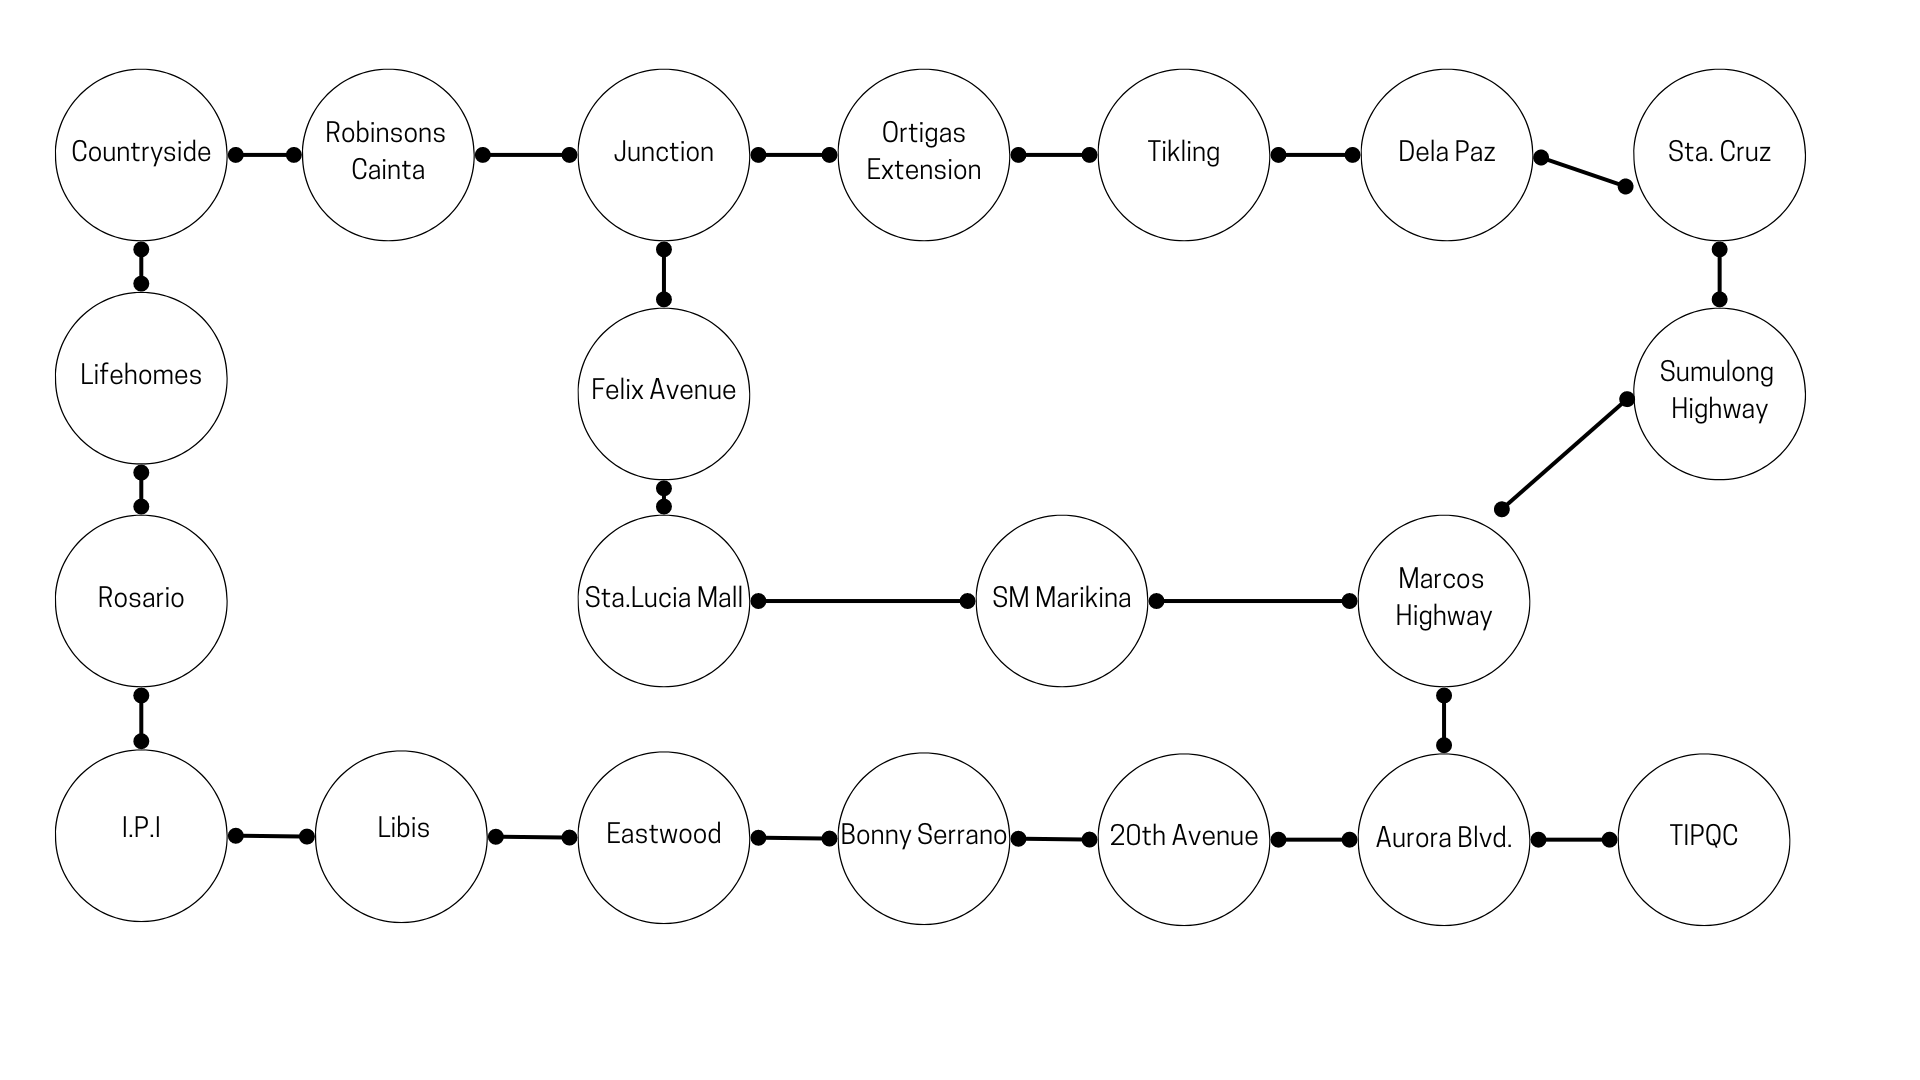

In [ ]:
# Graph of the directories of the Transport Routes
def DirectoryGraph():
    d = Digraph()
    for name in ("Countryside", "Lifehomes", "Junction", "I.P.I.", "Felix Avenue", "Eastwood", "Marcos Highway", "20th Avenue", "Aurora Boulevard, TIPQC"):
       d.addNode(Node(name))
    d.addEdge(Edge(d.getNode("Countryside"), d.getNode("Junction")))
    d.addEdge(Edge(d.getNode("Junction"), d.getNode("Felix Avenue")))
    d.addEdge(Edge(d.getNode("Felix Avenue"), d.getNode("Marcos Highway")))
    d.addEdge(Edge(d.getNode("Marcos Highway"), d.getNode("Aurora Boulevard")))
    d.addEdge(Edge(d.getNode("Countryside"), d.getNode("Lifehomes")))
    d.addEdge(Edge(d.getNode("Lifehomes"), d.getNode("I.P.I")))
    d.addEdge(Edge(d.getNode("I.P.I."), d.getNode("Eastwood")))
    d.addEdge(Edge(d.getNode("Eastwood"), d.getNode("20th Avenue")))
    d.addEdge(Edge(d.getNode("20th Avenue"), d.getNode("Aurora Boulevard")))
    d.addEdge(Edge(d.getNode("Aurora Boulevard"), d.getNode("TIPQC")))
    return d

In [ ]:
# type your code here using DFS
def graphDFS(graph, start, destination, path, shortest, toPrint=False):
    path = path + [start]
    if toPrint:
        print('Current Route (DFS): ' + printPath(path))
    if start == destination:
        return path
    for node in graph.childrenOf(start):
        if node not in path:
            if shortest is None or len(path) < len(shortest):
                newPath = graphDFS(graph, node, destination, path, shortest, toPrint)
                if newPath is not None:
                    shortest = newPath
        elif toPrint:
            print('Already visited', node)
    return shortest

In [ ]:
# type your code here using BFS
def BFS(graph, start, end, toPrint=False):
    initPath = [start]
    pathQueue = [initPath]
    while len(pathQueue) != 0:
        tmpPath = pathQueue.pop(0)
        if toPrint:
            print('Current Path (BFS):', printPath(tmpPath))
        lastNode = tmpPath[-1]
        if lastNode == end:
            return tmpPath
        for nextNode in graph.childrenOf(lastNode):
            if nextNode not in tmpPath:
                newPath = tmpPath + [nextNode]
                pathQueue.append(newPath)
    return None

In [ ]:
#Entirety of the Code with DFS Implementation
class Node(object):
    def __init__(self, name):
        self.name = name
    def getName(self):
        return self.name
    def __str__(self):
        return self.name

class Edge(object):
    def __init__(self, src, dest):
        self.src = src
        self.dest = dest
    def getSource(self):
        return self.src
    def getDestination(self):
        return self.dest
    def __str__(self):
        return self.src.getName() + ' -> ' + self.dest.getName()

class Digraph(object):
    def __init__(self):
        self.edges = {}
    def addNode(self, node):
        if node in self.edges:
            raise ValueError('Existing same node')
        else:
            self.edges[node] = []

    def addEdge(self, edge):
        src = edge.getSource()
        dest = edge.getDestination()
        if not (src in self.edges and dest in self.edges):
            raise ValueError('Node non-existent')
        self.edges[src].append(dest)

    def childrenOf(self, node):
        return self.edges[node]

    def hasNode(self, node):
        return node in self.edges

    def getNode(self, name):
        for n in self.edges:
            if n.getName() == name:
                return n
        raise NameError(name)

    def __str__(self):
        result = ''
        for src in self.edges:
            for dest in self.edges[src]:
                result = result + src.getName() + ' -> ' + dest.getName() + '\n'
        return result[:-1]

class Graph(Digraph):
    def addEdge(self, edge):
        Digraph.addEdge(self, edge)
        rev = Edge(edge.getDestination(), edge.getSource())
        Digraph.addEdge(self, rev)

def DirectoryGraph(graphType):
    d = graphType()
    for name in ("Countryside", "Lifehomes", "Junction", "Ortigas Ext.", "Tikling", "Dela Paz",
                 "Santa Cruz", "Sumulong Highway", "I.P.I.", "Robinsons Cainta", "Felix Avenue",
                 "Sta. Lucia Mall", "SM Marikina", "Rosario", "Libis", "Bonny Serrano", "Eastwood",
                 "Marcos Highway", "20th Avenue", "Aurora Boulevard", "TIPQC"):
        d.addNode(Node(name))
    d.addEdge(Edge(d.getNode("Countryside"), d.getNode("Robinsons Cainta")))
    d.addEdge(Edge(d.getNode("Robinsons Cainta"), d.getNode("Junction")))
    d.addEdge(Edge(d.getNode("Junction"), d.getNode("Felix Avenue")))
    d.addEdge(Edge(d.getNode("Felix Avenue"), d.getNode("Sta. Lucia Mall")))
    d.addEdge(Edge(d.getNode("Sta. Lucia Mall"), d.getNode("SM Marikina")))
    d.addEdge(Edge(d.getNode("SM Marikina"), d.getNode("Marcos Highway")))
    d.addEdge(Edge(d.getNode("Junction"), d.getNode("Ortigas Ext.")))
    d.addEdge(Edge(d.getNode("Ortigas Ext."), d.getNode("Tikling")))
    d.addEdge(Edge(d.getNode("Tikling"), d.getNode("Dela Paz")))
    d.addEdge(Edge(d.getNode("Dela Paz"), d.getNode("Santa Cruz")))
    d.addEdge(Edge(d.getNode("Santa Cruz"), d.getNode("Sumulong Highway")))
    d.addEdge(Edge(d.getNode("Sumulong Highway"), d.getNode("Marcos Highway")))
    d.addEdge(Edge(d.getNode("Countryside"), d.getNode("Lifehomes")))
    d.addEdge(Edge(d.getNode("Lifehomes"), d.getNode("Rosario")))
    d.addEdge(Edge(d.getNode("Rosario"), d.getNode("I.P.I.")))
    d.addEdge(Edge(d.getNode("I.P.I."), d.getNode("Libis")))
    d.addEdge(Edge(d.getNode("Libis"), d.getNode("Eastwood")))
    d.addEdge(Edge(d.getNode("Eastwood"), d.getNode("Bonny Serrano")))
    d.addEdge(Edge(d.getNode("Bonny Serrano"), d.getNode("20th Avenue")))
    d.addEdge(Edge(d.getNode("20th Avenue"), d.getNode("Aurora Boulevard")))
    d.addEdge(Edge(d.getNode("Marcos Highway"), d.getNode("Aurora Boulevard")))
    d.addEdge(Edge(d.getNode("Aurora Boulevard"), d.getNode("TIPQC")))
    return d

def printPath(path):
    result = ''
    for i in range(len(path)):
        result = result + str(path[i])
        if i != len(path) - 1:
            result = result + ' -> '
    return result

def graphDFS(graph, start, destination, path, shortest, toPrint=False):
    path = path + [start]
    if toPrint:
        print('Current Route (DFS): ' + printPath(path))
    if start == destination:
        return path
    for node in graph.childrenOf(start):
        if node not in path:
            if shortest is None or len(path) < len(shortest):
                newPath = graphDFS(graph, node, destination, path, shortest, toPrint)
                if newPath is not None:
                    shortest = newPath
        elif toPrint:
            print('Already visited', node)
    return shortest

def shortestPath(graph, start, destination, toPrint=False):
    return graphDFS(graph, start, destination, [], None, toPrint)

def testSP(source, destination):
    g = DirectoryGraph(Digraph)
    sp = shortestPath(g, g.getNode(source), g.getNode(destination), toPrint=True)
    if sp is not None:
        print('\nMinimal route is from', source, 'to', destination, 'by going', printPath(sp))
    else:
        print('No route exists for', source, 'towards', destination)

testSP('Countryside', 'TIPQC')

Current Route (DFS): Countryside
Current Route (DFS): Countryside -> Robinsons Cainta
Current Route (DFS): Countryside -> Robinsons Cainta -> Junction
Current Route (DFS): Countryside -> Robinsons Cainta -> Junction -> Felix Avenue
Current Route (DFS): Countryside -> Robinsons Cainta -> Junction -> Felix Avenue -> Sta. Lucia Mall
Current Route (DFS): Countryside -> Robinsons Cainta -> Junction -> Felix Avenue -> Sta. Lucia Mall -> SM Marikina
Current Route (DFS): Countryside -> Robinsons Cainta -> Junction -> Felix Avenue -> Sta. Lucia Mall -> SM Marikina -> Marcos Highway
Current Route (DFS): Countryside -> Robinsons Cainta -> Junction -> Felix Avenue -> Sta. Lucia Mall -> SM Marikina -> Marcos Highway -> Aurora Boulevard
Current Route (DFS): Countryside -> Robinsons Cainta -> Junction -> Felix Avenue -> Sta. Lucia Mall -> SM Marikina -> Marcos Highway -> Aurora Boulevard -> TIPQC
Current Route (DFS): Countryside -> Robinsons Cainta -> Junction -> Ortigas Ext.
Current Route (DFS): Cou

#Type your evaluation about the performance of DFS and BFS

*For choosing the shortest path, DFS seems to be more space-consuming by determining every possible path but is effective with more distances between nodes. For shorter implementations, BFS will suit better since the shortest path would be its result.*

In [ ]:
#Entirety of the Code with BFS Implementation
class Node(object):
    def __init__(self, name):
        self.name = name
    def getName(self):
        return self.name
    def __str__(self):
        return self.name

class Edge(object):
    def __init__(self, src, dest):
        self.src = src
        self.dest = dest
    def getSource(self):
        return self.src
    def getDestination(self):
        return self.dest
    def __str__(self):
        return self.src.getName() + ' -> ' + self.dest.getName()

class Digraph(object):
    def __init__(self):
        self.edges = {}
    def addNode(self, node):
        if node in self.edges:
            raise ValueError('Existing same node')
        else:
            self.edges[node] = []

    def addEdge(self, edge):
        src = edge.getSource()
        dest = edge.getDestination()
        if not (src in self.edges and dest in self.edges):
            raise ValueError('Node non-existent')
        self.edges[src].append(dest)

    def childrenOf(self, node):
        return self.edges[node]

    def hasNode(self, node):
        return node in self.edges

    def getNode(self, name):
        for n in self.edges:
            if n.getName() == name:
                return n
        raise NameError(name)

    def __str__(self):
        result = ''
        for src in self.edges:
            for dest in self.edges[src]:
                result = result + src.getName() + ' -> ' + dest.getName() + '\n'
        return result[:-1]

class Graph(Digraph):
    def addEdge(self, edge):
        Digraph.addEdge(self, edge)
        rev = Edge(edge.getDestination(), edge.getSource())
        Digraph.addEdge(self, rev)

def DirectoryGraph(graphType):
    d = graphType()
    for name in ("Countryside", "Lifehomes", "Junction", "Ortigas Ext.", "Tikling", "Dela Paz",
                 "Santa Cruz", "Sumulong Highway", "I.P.I.", "Robinsons Cainta", "Felix Avenue",
                 "Sta. Lucia Mall", "SM Marikina", "Rosario", "Libis", "Bonny Serrano", "Eastwood",
                 "Marcos Highway", "20th Avenue", "Aurora Boulevard", "TIPQC"):
        d.addNode(Node(name))
    d.addEdge(Edge(d.getNode("Countryside"), d.getNode("Robinsons Cainta")))
    d.addEdge(Edge(d.getNode("Robinsons Cainta"), d.getNode("Junction")))
    d.addEdge(Edge(d.getNode("Junction"), d.getNode("Felix Avenue")))
    d.addEdge(Edge(d.getNode("Felix Avenue"), d.getNode("Sta. Lucia Mall")))
    d.addEdge(Edge(d.getNode("Sta. Lucia Mall"), d.getNode("SM Marikina")))
    d.addEdge(Edge(d.getNode("SM Marikina"), d.getNode("Marcos Highway")))
    d.addEdge(Edge(d.getNode("Junction"), d.getNode("Ortigas Ext.")))
    d.addEdge(Edge(d.getNode("Ortigas Ext."), d.getNode("Tikling")))
    d.addEdge(Edge(d.getNode("Tikling"), d.getNode("Dela Paz")))
    d.addEdge(Edge(d.getNode("Dela Paz"), d.getNode("Santa Cruz")))
    d.addEdge(Edge(d.getNode("Santa Cruz"), d.getNode("Sumulong Highway")))
    d.addEdge(Edge(d.getNode("Sumulong Highway"), d.getNode("Marcos Highway")))
    d.addEdge(Edge(d.getNode("Countryside"), d.getNode("Lifehomes")))
    d.addEdge(Edge(d.getNode("Lifehomes"), d.getNode("Rosario")))
    d.addEdge(Edge(d.getNode("Rosario"), d.getNode("I.P.I.")))
    d.addEdge(Edge(d.getNode("I.P.I."), d.getNode("Libis")))
    d.addEdge(Edge(d.getNode("Libis"), d.getNode("Eastwood")))
    d.addEdge(Edge(d.getNode("Eastwood"), d.getNode("Bonny Serrano")))
    d.addEdge(Edge(d.getNode("Bonny Serrano"), d.getNode("20th Avenue")))
    d.addEdge(Edge(d.getNode("20th Avenue"), d.getNode("Aurora Boulevard")))
    d.addEdge(Edge(d.getNode("Marcos Highway"), d.getNode("Aurora Boulevard")))
    d.addEdge(Edge(d.getNode("Aurora Boulevard"), d.getNode("TIPQC")))
    return d

def printPath(path):
    result = ''
    for i in range(len(path)):
        result = result + str(path[i])
        if i != len(path) - 1:
            result = result + ' -> '
    return result

def BFS(graph, start, end, toPrint=False):
    initPath = [start]
    pathQueue = [initPath]
    while len(pathQueue) != 0:
        tmpPath = pathQueue.pop(0)
        if toPrint:
            print('Current Path (BFS):', printPath(tmpPath))
        lastNode = tmpPath[-1]
        if lastNode == end:
            return tmpPath
        for nextNode in graph.childrenOf(lastNode):
            if nextNode not in tmpPath:
                newPath = tmpPath + [nextNode]
                pathQueue.append(newPath)
    return None

def shortestPath(graph, start, end, toPrint=False):
    return BFS(graph, start, end, toPrint)

def testSP(source, destination):
    g = DirectoryGraph(Digraph)
    sp = shortestPath(g, g.getNode(source), g.getNode(destination), toPrint=True)
    if sp is not None:
        print('\nMinimal route is from', source, 'to', destination, 'by going', printPath(sp))
    else:
        print('No route exists for', source, 'towards', destination)

testSP('Countryside', 'TIPQC')

Current Path (BFS): Countryside
Current Path (BFS): Countryside -> Robinsons Cainta
Current Path (BFS): Countryside -> Lifehomes
Current Path (BFS): Countryside -> Robinsons Cainta -> Junction
Current Path (BFS): Countryside -> Lifehomes -> Rosario
Current Path (BFS): Countryside -> Robinsons Cainta -> Junction -> Felix Avenue
Current Path (BFS): Countryside -> Robinsons Cainta -> Junction -> Ortigas Ext.
Current Path (BFS): Countryside -> Lifehomes -> Rosario -> I.P.I.
Current Path (BFS): Countryside -> Robinsons Cainta -> Junction -> Felix Avenue -> Sta. Lucia Mall
Current Path (BFS): Countryside -> Robinsons Cainta -> Junction -> Ortigas Ext. -> Tikling
Current Path (BFS): Countryside -> Lifehomes -> Rosario -> I.P.I. -> Libis
Current Path (BFS): Countryside -> Robinsons Cainta -> Junction -> Felix Avenue -> Sta. Lucia Mall -> SM Marikina
Current Path (BFS): Countryside -> Robinsons Cainta -> Junction -> Ortigas Ext. -> Tikling -> Dela Paz
Current Path (BFS): Countryside -> Lifehome

#Type your conclusion here:

In conclusion of the activity, I have learned that there are two possible implementation in searching for the shortest path in a graph given the code, the BFS and DFS, with each having their own practicality usage scenarios to be applied to certain problems.